## **Assignment for Ethology and the Evolution of Behavior**

---



Jung Park
jp3641

Write code to simulate an Evolutionary Stable Strategy inspired by the classic Hawk-Dove game from Maynard Smith.

In this simulation, hawks fight to the death for resources and have a certain chance of beating doves in fights.

Doves fight hawks because hawks provoke them but they don't fight other doves.

Encounters between individuals happen before reproduction.

Winners of fights, because they gain more resources, can make more offspring than animals that don't fight (or who die in a fight).

In this simple simulation, animals reproduce clonally and then die.

Your simulations should go for 1000 generations (iterations). Vary the population size, the initial proportion of hawks and doves, the chance that hawks beat doves at fights, and the relative fitness of the winner. Limit the total population size to 1000.

Hand in your code along with a report of your observations and graphs supporting those observations. For example, when do doves (hawks) overtake hawks (doves) in the population? Under which do hawks and doves coexist and at which frequencies?

You can work in groups with classmates to write the code but each person needs to make their own observations and analyses and hand in their own report. If you worked as a team and you were not responsible for writing the code, your report should include pseudocode (Links to an external site.) written by you.

Hawk-dove game looks to identify an Evolutionary Stable Strategy (ESS) in a population by evaluating trade-off between the reward and cost of obtaining food. In the game, population of animals compete for a finite resource (i.e. food). Hawks and Doves symbolize aggressive and passive strategies.

**Hawks**: aggressive, fight for resource

**Doves**: passive, share instead of fight for resource

**Three different types of pairs:**
**Hawk vs Hawk**: engage in 50:50 battle for resource. Winner-takes-all

**Hawk vs Dove**: Dove fight when attacked by hawk. #Need to vary probability

**Dove vs Dove**: Doves don't fight other doves. Share resource evenly

D = probability of adopting Dove strategy

H = probability of adopting Hawk strategy

Equilibrium: D = H

*d*+*h* = 1

Fitness of hawk = *d* ⋅ E(hawk,dove) + *d* ⋅ E(hawk,hawk)

Fitness of dove = *d* ⋅ E(dove,dove) + *h* ⋅ E(dove,hawk)

If D < H: hawks do better, fraction of hawks increase in next generation
If D > H: vise versa

Inspiration drawn from: https://www.youtube.com/watch?v=YNMkADpvO4w&ab_channel=Primer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In this model, the animals fight for indivisible resource. We can vary the cost of reward, and injury. We can even include a variable for the cost of interaction between two doves (did not include this variable in simulations below).

In [ ]:
V = 20 #Reward for food
I = 15 #Cost of injury when 2 hawks fight. Extra variable
C = .7 #Probability of hawk beating a dove

action_payoff = np.array([[(V-I)/2, C*V],
                           [(1-C)*V, V/2]])

print("Payoff Matrix")
print(action_payoff)

#for example, if one player chooses dove and another chooses hawk...
hawk = 0
dove = 1

p1_choice = dove
p2_choice = hawk

p1_reward = action_payoff[p1_choice, p2_choice]
p2_reward = action_payoff[p2_choice, p1_choice]

print("P1=dove, P2=Hawk")
print("Player 1's reward: {0}".format(p1_reward))
print("Player 2's reward: {0}".format(p2_reward))

Payoff Matrix
[[ 2.5 14. ]
 [ 6.  10. ]]
P1=dove, P2=Hawk
Player 1's reward: 6.000000000000001
Player 2's reward: 14.0


Finding equilibrium of strategies in a population. Higher payoff = better strategy for obtaining more reward.


In [ ]:
init_hawk_freq = .4 #can vary
init_dove_freq = 1-init_hawk_freq

hawk_average_payoff = action_payoff[hawk, hawk] * init_hawk_freq + action_payoff[hawk, dove] * init_dove_freq
dove_average_payoff = action_payoff[dove, hawk] * init_hawk_freq + action_payoff[dove, dove] * init_dove_freq
print('Average Hawk Payoff in a population with {0:.0f}% Hawks: {1}'.format(init_hawk_freq*100, hawk_average_payoff))
print('Average Dove Payoff in a population with {0:.0f}% Hawks: {1}'.format(init_hawk_freq*100, dove_average_payoff))

Average Hawk Payoff in a population with 40% Hawks: 9.4
Average Dove Payoff in a population with 40% Hawks: 8.4


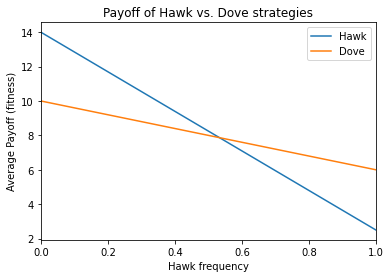

In [ ]:
#Calculate the average payoff for a strategy
def calculate_average_payoff(strategy, action_payoff, strategy_frequencies):
    average_payoff = np.sum(action_payoff[strategy] * strategy_frequencies)
    return average_payoff


#Calculate the relative fitness for a strategy
def calculate_relative_fitness(strategy, action_payoff, strategy_frequencies):
    normalised_action_payoff = (action_payoff - np.min(action_payoff)) / (np.max(action_payoff) - np.min(action_payoff))
    fitness = np.sum(normalised_action_payoff[strategy] * strategy_frequencies)
    return fitness

hawk_frequencies = np.linspace(0, 1)
hawk_strategy_by_frequency = [calculate_average_payoff(hawk, action_payoff, [i, 1-i]) for i in hawk_frequencies]
dove_strategy_by_frequency = [calculate_average_payoff(dove, action_payoff, [i, 1-i]) for i in hawk_frequencies]

plt.plot(hawk_frequencies, hawk_strategy_by_frequency)
plt.plot(hawk_frequencies, dove_strategy_by_frequency)

plt.legend(('Hawk', 'Dove'))
plt.xlabel('Hawk frequency')
plt.ylabel('Average Payoff (fitness)')
plt.xlim([0, 1])
plt.title('Payoff of Hawk vs. Dove strategies')
plt.show()



Depending on changes to variables V, I, C which influences the payoff matrix, the average payoffs vary as a function of the ratio of hawks in a population. The equilibrium point will shift to the right if the reward (V) increases. Alternatively, the equilibrium point shifts to the left as the cost of injury (I) increases. This point shifts to the right as the probability of the hawk winning against the dove increases.

Fitness of hawks and doves decline as there are more hawks in the population. When hawks are rare, being a hawk is better. Once you cross the equilibrium, doves do better. Fitness for strategies is frequency dependant.

Model parameters
*   Reproduce clonally and then die
*   1000 generations
*   Vary population size (the initial proportion of hawks and doves)
*   Vary chance that hawks beat doves (variable C)
*   Limit total population size to 1000

Let's first look at the evolution of the two strategies over the first 50 generations (only 50 for visualization-sake). This is dependent on V, C, I. Initial hawk frequency dictates y axis at generation 0, and influences how quickly (# of generations) we reach the equilibrium point.


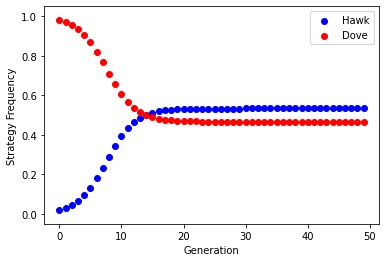

In [ ]:
iterations = 50 #generations
hawk_freq = 0.02

ax = plt.subplot()
ax.set_xlabel('Generation')
ax.set_ylabel('Strategy Frequency')
ax.set_ylim([-0.05,1.05])

# Run simulation over X generations to optimise strategy frequencies
for i_generation in range(0, iterations):
    
    # Plot current strategy frequencies
    ax.scatter(i_generation, hawk_freq, c='b')
    ax.scatter(i_generation, 1-hawk_freq, c='r')
    
    # Calculate population fitness
    hawk_fitness = calculate_relative_fitness(hawk, action_payoff, [hawk_freq, 1-hawk_freq])
    dove_fitness = calculate_relative_fitness(dove, action_payoff, [hawk_freq, 1-hawk_freq]) 
    
    # Calculate relative strategy fitness
    reference_strategy = np.max([hawk_fitness, dove_fitness])
    hawk_relative_fitness = hawk_fitness / reference_strategy
    dove_relative_fitness = dove_fitness / reference_strategy

        
    # Update Hawk strategy fitness (Dove is updated by proxy)    
    hawk_freq = (hawk_relative_fitness * hawk_freq)/((hawk_relative_fitness * hawk_freq)+(dove_relative_fitness * (1-hawk_freq)))

ax.legend(['Hawk', 'Dove']);

At first, the hawk population grows slowly but grows rapidly until there are more hawks than doves. Both populations plateu once they reach the equilibrium point.


The below simulation was modified from work by **Jacob Portes**, with permission. All modifications, analysis, and interpretation performed by Jung Park.

In [ ]:
 def hawk_dove_simulation_variation(V=20,
                         I=15,
                         birth_threshold=10,
                         death_threshold=0,
                         iterations=1000,
                         init_population_size=100,
                         p_hawk_beats_dove=0.7, #defined as variable C above
                         relative_fitness=0.2,
                         init_hawk_freq=0.02,
                         init_fitness=5,
                         birth_rate=2):


    
    init_dove_freq = 1-init_hawk_freq

    """
    as before: 
    hawk = 0
    dove = 1

    Each food is worth 2 points.
    A creature requires 1 food point to survive a generation.
    It will die without a food point.
    If it gets more than 1 point, it can reproduce.

    these two lists will keep track of bird identity and bird fitness
    """
    bird_identity = np.random.choice([0,1],init_population_size,p=[init_hawk_freq,init_dove_freq])
    bird_fitness = init_fitness*np.ones(len(bird_identity))


    num_doves = []
    num_hawks = []

    cumsum_doves=[]
    cumsum_hawks=[]

    for iter in range(iterations):

        # randomly select two birds
        i,j = np.random.choice(range(len(bird_identity)),2,replace=False)

        #print(i,j)

        # both hawks: winner takes all, 50% chance
        if bird_identity[i] == 0 and bird_identity[j] == 0:
            if np.random.rand() > 0.5: # assume 50% chance one hawk beating other
                bird_fitness[i] += V-I
                bird_fitness[j] = death_threshold
            else:
                bird_fitness[i] = death_threshold
                bird_fitness[j] += V-I
        
        # both doves: Share resources evenly, lives to see another day
        if bird_identity[i] == 1 and bird_identity[j] == 1:         
            bird_fitness[i] += V/2 # no gain
            bird_fitness[j] += V/2

        # dove hawk: dove fights back w/ 1-p_hawk_beats_dove chance (low). Winner takes all
        if bird_identity[i] >  bird_identity[j]:
            if np.random.rand() > p_hawk_beats_dove: 
                bird_fitness[i] += V # dove gains
            else:
                bird_fitness[j] += V # hawk gains

        # hawk dove: hawk fights dove w/ p_hawk_beats_dove (high). Winner takes all
        if bird_identity[i] <  bird_identity[j]:
            if np.random.rand() > (1-p_hawk_beats_dove):
                bird_fitness[i] += V # hawk wins
            else:
                bird_fitness[j] += V # dove wins

        # if fitness > birth_threshold, duplicate and die
        birth_ind = np.where(bird_fitness >= birth_threshold)

        new_hawks = np.count_nonzero(bird_identity[birth_ind] == 0)*birth_rate
        new_doves = np.count_nonzero(bird_identity[birth_ind] == 1)*birth_rate

        bird_identity = np.append(bird_identity,0*np.ones(new_hawks))
        bird_identity = np.append(bird_identity,1*np.ones(new_doves))

        # initialize fitness values for new birds
        bird_fitness = np.append(bird_fitness,init_fitness*np.ones(new_hawks+new_doves))

        bird_fitness[birth_ind] = death_threshold # set to zero, and then remove

        # if fitness < death_threshold, remove
        death_ind = np.where(bird_fitness <= death_threshold)
        bird_fitness = np.delete(bird_fitness,death_ind)
        bird_identity = np.delete(bird_identity,death_ind)


        num_hawks.append(np.count_nonzero(bird_identity == 0))
        num_doves.append(np.count_nonzero(bird_identity == 1))

        cumsum_hawks.append(np.sum(bird_fitness[np.where(bird_identity==0)[0]]))
        cumsum_doves.append(np.sum(bird_fitness[np.where(bird_identity==1)[0]]))


    sim = {}
    sim['bird_identity'] = bird_identity
    sim['bird_fitness'] = bird_fitness
    sim['num_hawks'] = np.asarray(num_hawks)
    sim['num_doves'] = np.asarray(num_doves)
    sim['cumsum_hawks'] = np.asarray(cumsum_hawks)
    sim['cumsum_doves'] = np.asarray(cumsum_doves)
    sim['V']=V
    return sim

In [ ]:
def plot_population(sim,title='Population',**kwargs):
    fig = plt.figure()
    plt.plot(sim['num_hawks'],label='hawks')
    plt.plot(sim['num_doves'],label='doves')
    plt.legend()
    plt.ylim(bottom=0)
    plt.xlabel('iterations')
    plt.ylabel('population size')
    plt.title(title)
    return fig

def plot_fitness(sim,title='Fitness',**kwargs):
    fig = plt.figure()
    plt.plot(sim['cumsum_hawks'],label='hawks')
    plt.plot(sim['cumsum_doves'],label='doves')
    plt.legend()
    plt.ylim(bottom=0)
    plt.xlabel('iterations')
    plt.ylabel('total fitness')
    plt.title(title)
    return fig

def plot_ratio(sim,title='Ratio',MSNE=False,**kwargs):

    fig = plt.figure()
    ratio_hawks = sim['num_hawks']/(sim['num_hawks'] + sim['num_doves'])
    ratio_doves = sim['num_doves']/(sim['num_hawks'] + sim['num_doves'])
    plt.plot(ratio_hawks,label='ratio hawks')
    plt.plot(ratio_doves,label='ratio doves')
    if MSNE:
        # plt.axhline(y=sim['V']/(2*sim['W']),xmin=0,xmax=10000,linestyle='--',color='C0',label='MSNE hawks')
        # plt.axhline(y=1-sim['V']/(2*sim['W']),xmin=0,xmax=10000,linestyle='--',color='C1',label='MSNE doves')

        p = (0.5*sim['V'] + sim['T'])/(0.5*sim['W']+sim['T'])
        plt.axhline(y=p,xmin=0,xmax=10000,linestyle='--',color='C0',label='MSNE hawks')
        plt.axhline(y=1-p,xmin=0,xmax=10000,linestyle='--',color='C1',label='MSNE doves')
    plt.ylim(0,1)
    plt.legend(loc=1)
    plt.xlabel('iterations')
    plt.ylabel('ratio')
    plt.title(title)
    
    return fig

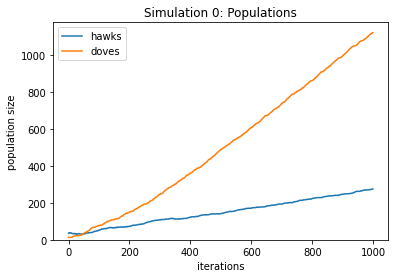

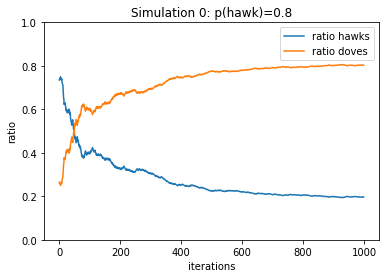

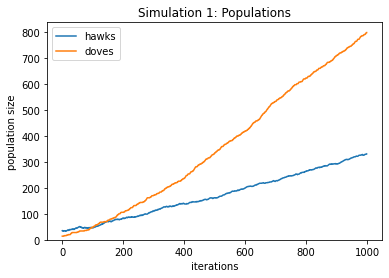

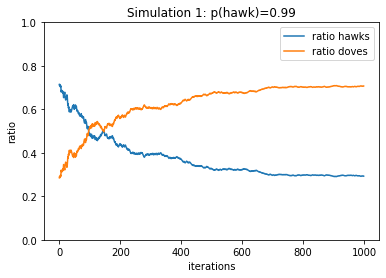

In [ ]:
sim0 = hawk_dove_simulation_variation(V=20,
                         I=15,
                         birth_threshold=20,
                         death_threshold=0,
                         iterations=1000,
                         init_population_size=50,
                         p_hawk_beats_dove=0.8,
                         relative_fitness=0.02,
                         init_hawk_freq=0.7,
                         init_fitness=10,
                         birth_rate=2)

sim1 = hawk_dove_simulation_variation(V=20,
                         I=15,
                         birth_threshold=20,
                         death_threshold=0,
                         iterations=1000,
                         init_population_size=50,
                         p_hawk_beats_dove=0.99,
                         relative_fitness=0.02,
                         init_hawk_freq=0.7,
                         init_fitness=10,
                         birth_rate=2)

fig = plot_population(sim0,title='Simulation 0: Populations')
fig = plot_ratio(sim0,MSNE=False,title='Simulation 0: p(hawk)=0.8')

fig = plot_population(sim1,title='Simulation 1: Populations')
fig = plot_ratio(sim1,MSNE=False,title='Simulation 1: p(hawk)=0.99')

The inclusion of Variable "I" (cost of hawk-hawk fight) keeps the hawk population relatively low. It can only reproduce when it fights and wins against a dove. I therefore had the initial population start with more hawks (.7) to observe when doves overtake hawks in the population. Given that V and I remain the same, Sim0 and Sim1 looks at changes in the population when we vary the probability hawks win against doves. By increasing p(hawk), we see that doves overtake hawks in later generations.

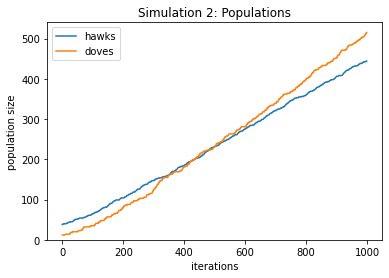

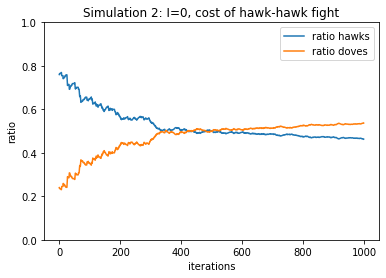

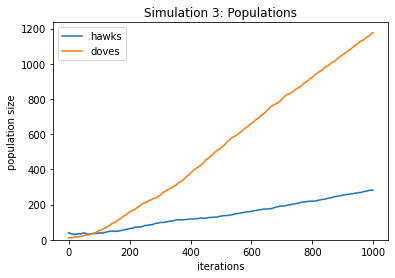

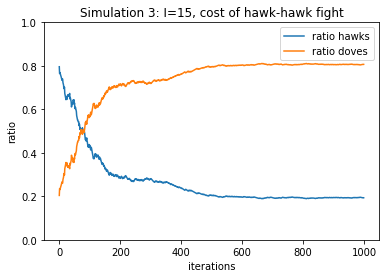

In [ ]:
sim2 = hawk_dove_simulation_variation(V=20,
                         I=0,
                         birth_threshold=20,
                         death_threshold=0,
                         iterations=1000,
                         init_population_size=50,
                         p_hawk_beats_dove=0.9,
                         relative_fitness=0.02,
                         init_hawk_freq=0.7,
                         init_fitness=10,
                         birth_rate=2)

sim3 = hawk_dove_simulation_variation(V=20,
                         I=15,
                         birth_threshold=20,
                         death_threshold=0,
                         iterations=1000,
                         init_population_size=50,
                         p_hawk_beats_dove=0.9,
                         relative_fitness=0.02,
                         init_hawk_freq=0.7,
                         init_fitness=10,
                         birth_rate=2)

fig = plot_population(sim2,title='Simulation 2: Populations')
fig = plot_ratio(sim2,MSNE=False,title='Simulation 2: I=0, cost of hawk-hawk fight')

fig = plot_population(sim3,title='Simulation 3: Populations')
fig = plot_ratio(sim3,MSNE=False,title='Simulation 3: I=15, cost of hawk-hawk fight')

When we eliminate the cost of hawk-hawk fights (variable "I"), we see that the hawk population grows at a similar rate as doves (sim2). Only by generation ~400 do doves overtake hawks. 